In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
from sqlalchemy import text
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)



In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
query = text('SELECT MAX(date) FROM measurement')
results = session.execute(query)

for row in results:
    print(row)

('2017-08-23',)


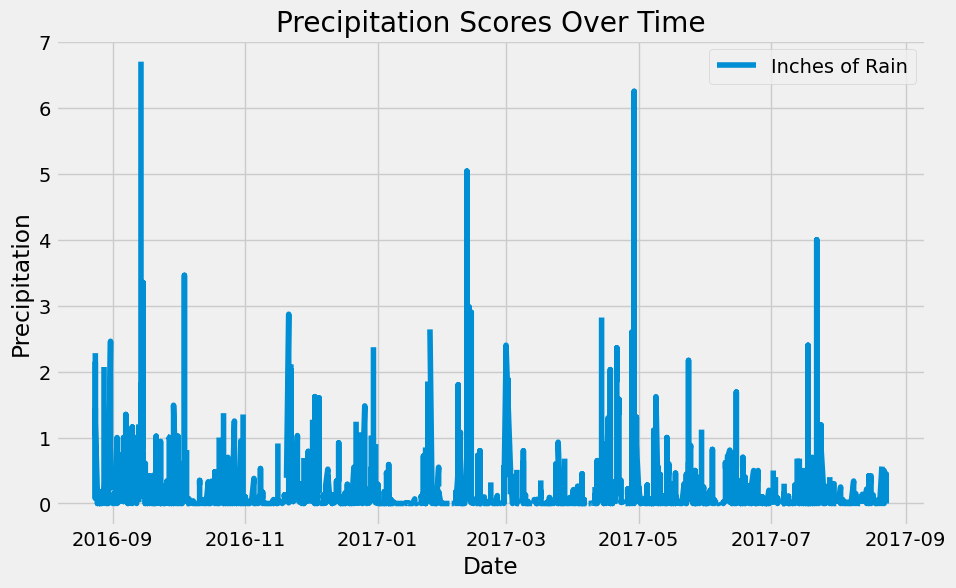

In [31]:
import pandas as pd
from sqlalchemy import text
from datetime import datetime, timedelta


start_date = datetime.strptime("2017-08-23", "%Y-%m-%d") - timedelta(days=365)

query = text('SELECT date, prcp FROM measurement WHERE date >= :start_date ORDER BY date DESC')
results = session.execute(query, {"start_date": start_date})

df = pd.DataFrame(results, columns=["date", "prcp"])

df['date'] = pd.to_datetime(df['date'])

df

df.sort_values(by='date', inplace=True)

# Plot the data using Pandas Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['prcp'], label='Inches of Rain')
plt.title('Precipitation Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()


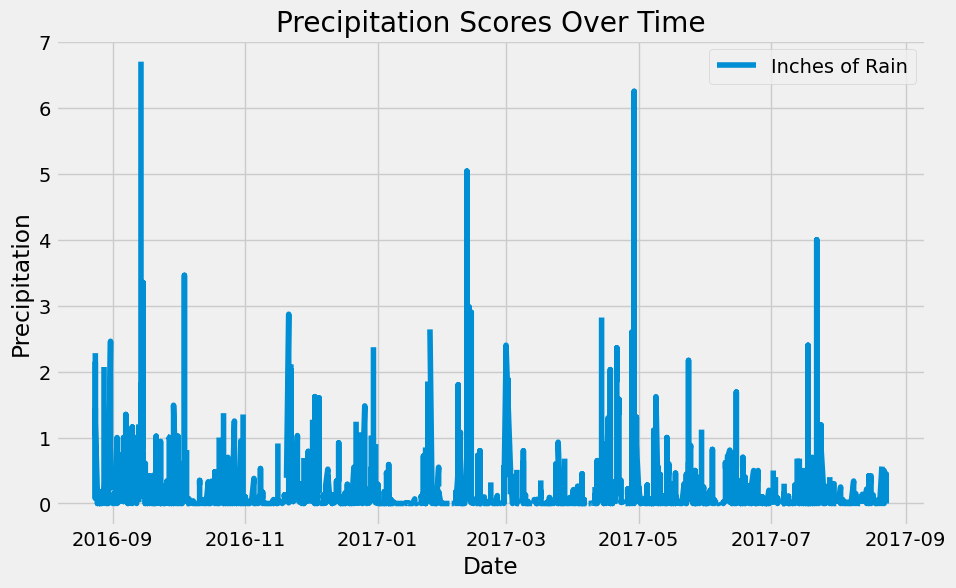

In [32]:



# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = datetime.strptime("2017-08-23", "%Y-%m-%d") - timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
query = text('SELECT date, prcp FROM measurement WHERE date >= :start_date ORDER BY date DESC')
results = session.execute(query, {"start_date": start_date})

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=["date", "prcp"])

df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by date
df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['prcp'], label='Inches of Rain')
plt.title('Precipitation Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()


In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = df['prcp'].describe()

# Print the summary statistics
precipitation_summary

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number of stations in the dataset
query = text('SELECT COUNT(DISTINCT station) FROM station')
results = session.execute(query)

for row in results:
    print(row)

(9,)


In [44]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

query = text('SELECT station, COUNT() FROM measurement GROUP BY 1 ORDER By 2 DESC')
results = session.execute(query)

for row in results:
    print(row)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = text('SELECT min(prcp), max(prcp), avg(prcp) FROM measurement WHERE station = "USC00519281"' )
results = session.execute(query)

for row in results:
    print(row)

(0.0, 9.64, 0.2123520923520915)


In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = text('SELECT min(tobs), max(tobs), avg(tobs) FROM measurement WHERE station = "USC00519281"' )
results = session.execute(query)

for row in results:
    print(row)

(54.0, 85.0, 71.66378066378067)


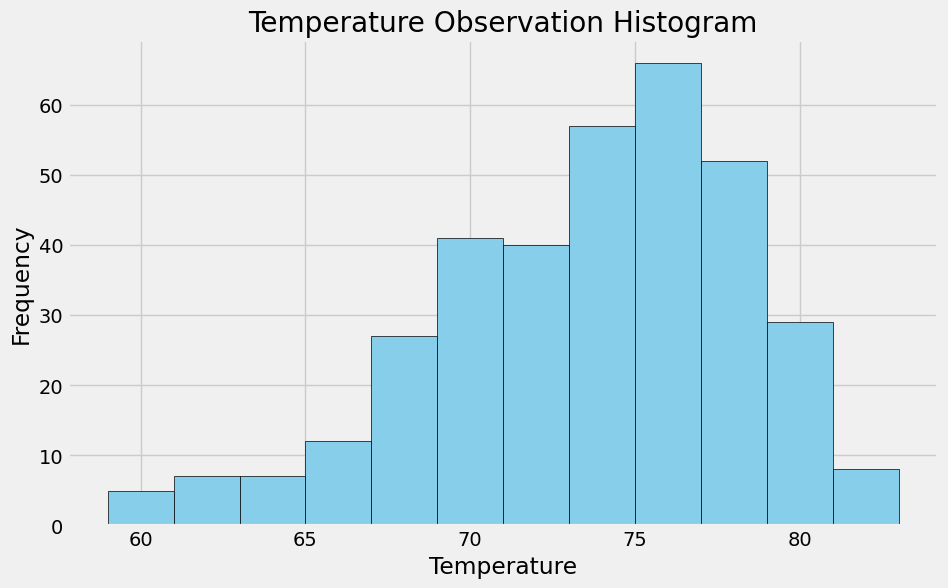

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = text('SELECT date, tobs FROM measurement WHERE station = :station AND date >= :start_date')
params = {"station": "USC00519281", "start_date": start_date}  

results = session.execute(query, params)

df = pd.DataFrame(results, columns=["date", "temperature"])

plt.figure(figsize=(10, 6))
plt.hist(df['temperature'],bins = 12,color='skyblue', edgecolor='black')
plt.title('Temperature Observation Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Close Session

In [58]:
# Close Session
session.close()